# Fake Bill Classification

## Importing required modules

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from matplotlib import pyplot as plt
import seaborn as sns

## Getting dataset

In [3]:
df = pd.read_csv("data/proj97/fake_bills.csv", sep=';')
df.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


## isna

In [4]:
df.isna().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

In [13]:
df["margin_low"] = df.groupby("is_genuine")["margin_low"].apply(lambda x: x.fillna(x.mean()))

In [14]:
df.isna().sum()

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

In [15]:
df.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


## Exploring dataset

<AxesSubplot:xlabel='length', ylabel='diagonal'>

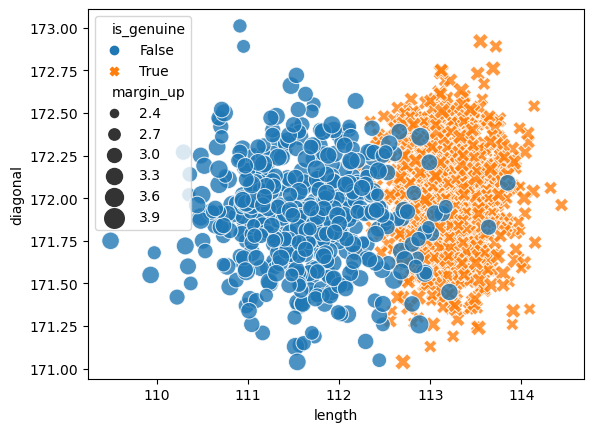

In [20]:
sns.scatterplot(data=df, x="length", y="diagonal", hue="is_genuine", style="is_genuine", size="margin_up", sizes=(20, 200), alpha=0.8)


<AxesSubplot:xlabel='length', ylabel='Count'>

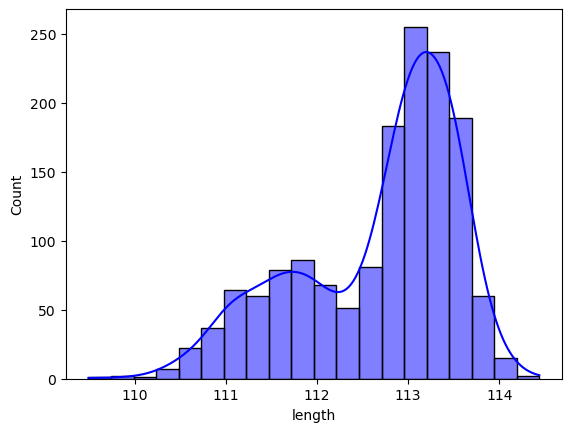

In [22]:
sns.histplot(data=df, x="length", bins=20, kde=True, color="blue")

<AxesSubplot:>

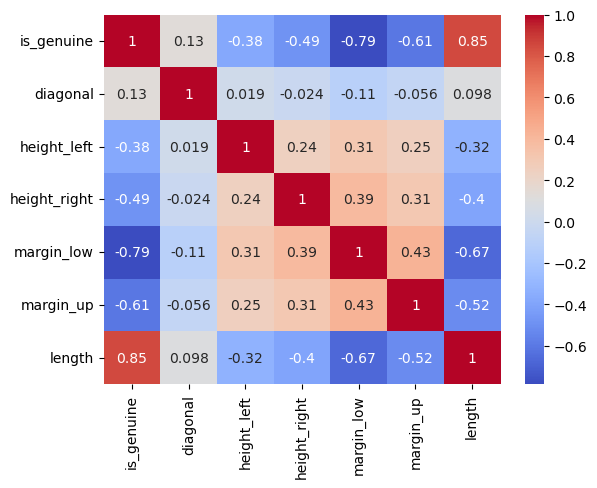

In [23]:
corr = df.corr()
sns.heatmap(corr, cmap="coolwarm", annot=True)

## Pre Processing dataset

In [24]:
X = df.drop("is_genuine", axis=1)
y = df["is_genuine"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Training dataset

In [30]:
rclf = RandomForestClassifier()
rclf.fit(X_train.values, y_train.values)
rclf.score(X_test.values, y_test.values)

0.9766666666666667

In [31]:
xclf = XGBClassifier()
xclf.fit(X_train.values, y_train.values)
xclf.score(X_test.values, y_test.values)

0.98

In [32]:
knclf = KNeighborsClassifier()
knclf.fit(X_train.values, y_train.values)
knclf.score(X_test.values, y_test.values)

0.9766666666666667

## Making Prediction

In [34]:
xclf.predict([X_test.values[3]])

array([1])

In [35]:
rclf.predict([X_test.values[3]])

array([ True])

In [36]:
knclf.predict([X_test.values[3]])

array([ True])